🔍 Project Overview
This project aims to analyze restaurant data to uncover trends, performance, and location-based patterns. The dataset includes restaurant names, ratings, votes, locations (latitude and longitude), and other attributes.

Key Objectives:
Visualize geographic distribution of restaurants using longitude and latitude.

Identify and analyze restaurant chains with multiple locations.

Compare popularity and performance using metrics like:

Number of locations

Aggregate ratings

Total votes

Techniques Used:
Exploratory Data Analysis (EDA) to assess distribution and key patterns.

Data grouping and aggregation to evaluate restaurant chain performance.

Visualizations using matplotlib and seaborn for:

Restaurant clusters on a map

Bar and line plots for chain comparison



C:\Users\admin\AppData\Local\Temp\ipykernel_14740\575148124.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\admin\AppData\Local\Temp\ipykernel_14740\575148124.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_chains['Restaurant Name'], rotation=45, ha='right')


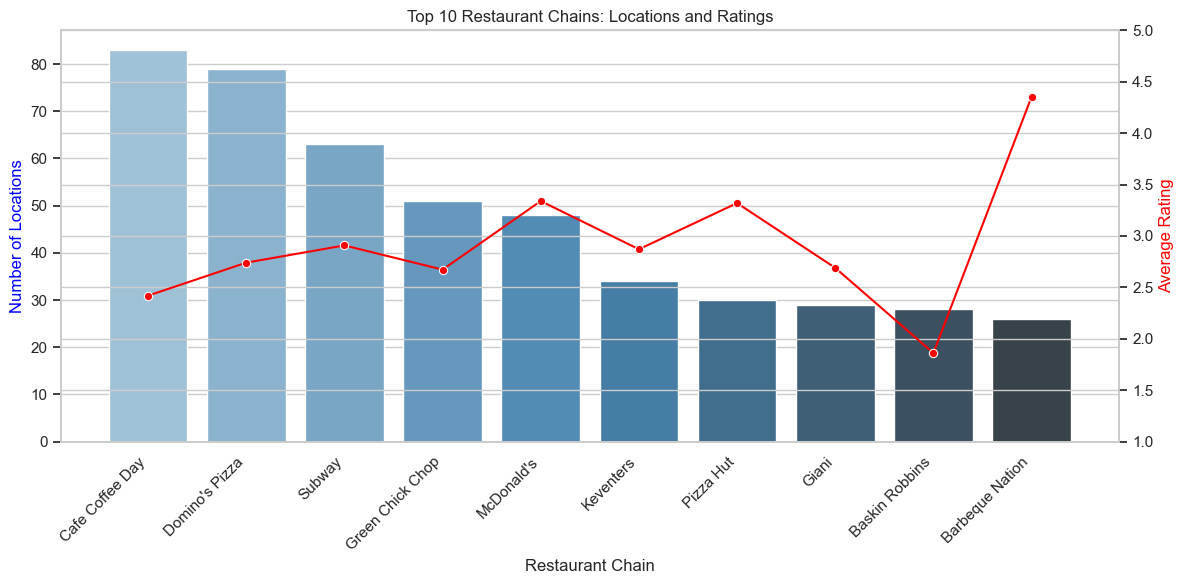

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = (r"C:\Users\admin\Downloads\Dataset  (1).csv")
df = pd.read_csv(file_path)

# Identify restaurant chains
chain_counts = df['Restaurant Name'].value_counts()
restaurant_chains = chain_counts[chain_counts > 1]
chains_df = df[df['Restaurant Name'].isin(restaurant_chains.index)]

# Analyze ratings and votes for chains
chain_analysis = chains_df.groupby('Restaurant Name').agg({
    'Aggregate rating': ['mean', 'count'],
    'Votes': 'sum'
}).reset_index()

# Rename columns
chain_analysis.columns = ['Restaurant Name', 'Average Rating', 'Number of Locations', 'Total Votes']
chain_analysis_sorted = chain_analysis.sort_values(by=['Number of Locations', 'Total Votes'], ascending=False)

# Visualization
sns.set(style="whitegrid")
top_chains = chain_analysis_sorted.head(10)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Number of Locations
sns.barplot(
    x='Restaurant Name',
    y='Number of Locations',
    data=top_chains,
    palette='Blues_d',
    ax=ax1
)
ax1.set_ylabel('Number of Locations', color='blue')
ax1.set_xlabel('Restaurant Chain')
ax1.set_xticklabels(top_chains['Restaurant Name'], rotation=45, ha='right')

# Line plot for Average Rating
ax2 = ax1.twinx()
sns.lineplot(
    x='Restaurant Name',
    y='Average Rating',
    data=top_chains,
    marker='o',
    color='red',
    ax=ax2
)
ax2.set_ylabel('Average Rating', color='red')
ax2.set_ylim(1, 5)

plt.title('Top 10 Restaurant Chains: Locations and Ratings')
plt.tight_layout()
plt.show()


✅ Conclusion
Restaurant Clustering: Visualization shows geographic clusters of restaurants, with dense concentrations in areas like Makati and Mandaluyong, indicating high commercial activity.

Chain Performance: The top restaurant chains were identified based on the number of locations and customer engagement (votes and ratings).

Business Insight: Chains with more locations tend to attract more customer votes, though higher location count does not always mean higher average ratings.

Actionable Takeaways:

High-density areas could be targets for new restaurant openings or marketing efforts.

Customer engagement and quality (ratings) should be balanced when expanding chains.

